In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prepare Datasets

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2 as cv
import os

In [ ]:
trnset_path = os.listdir("/content/drive/MyDrive/xray_dataset1/train")
tstset_path = os.listdir("/content/drive/MyDrive/xray_dataset1/test")
print(f"There are {len(trnset_path)} images in training dataset.")
print(f"There are {len(tstset_path)} images in testing dataset.")

There are 489 images in training dataset.
There are 60 images in testing dataset.


In [ ]:
trnimgs = list()
trnlabs = list()

for filename in tqdm(trnset_path):
 
  
  # img(X)
  img = cv.imread(f"/content/drive/MyDrive/xray_dataset1/train/{filename}")
  img = cv.resize(img, (64, 64)) 
  img = img/255. # normalization
  trnimgs.append(img)

  # lable(Y)
  lab = filename.split("(")[0]
  if lab == "COVID-19":
    trnlabs.append(0) # covid = 0
  elif lab == "NORMAL":
    trnlabs.append(1) # normal = 1
  else:
    print("some filename wrong")

# 把 list 轉換成 numpy array
trnimgs = np.array(trnimgs)
trnlabs = np.array(trnlabs)

100%|██████████| 489/489 [00:17<00:00, 27.30it/s]


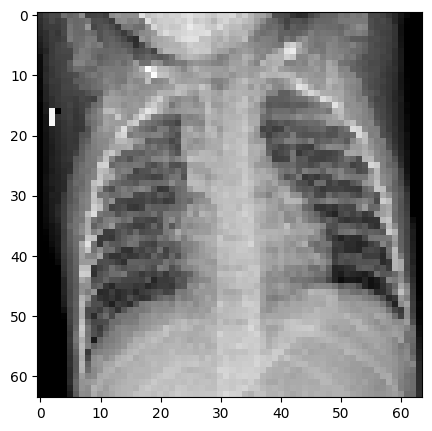

In [ ]:
import random
plt.figure(figsize=(5,5))
plt.imshow(trnimgs[random.randint(0,len(trnlabs))])
plt.show()

In [ ]:
trn_x, val_x, trn_y, val_y = train_test_split(trnimgs, trnlabs, test_size=0.2)
print(trn_x.shape)
print(val_x.shape)
assert trn_x.shape[0] == trn_y.shape[0], "[Train] These two numbers should be the same."
assert val_x.shape[0] == val_y.shape[0], "[Valid] These two numbers should be the same."

(391, 64, 64, 3)
(98, 64, 64, 3)


Build CNN Model


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2
# model from https://www.tensorflow.org/tutorials/images/classification

model = Sequential([  
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(64, 64, 3), kernel_regularizer=L2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=L2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=L2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=L2(1e-3)),
  layers.Dense(2)#,activation='softmax'
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

Train model

In [ ]:
history = model.fit(
    x = trn_x,
    y = trn_y,
    batch_size = 64,
    validation_data = (val_x, val_y),
    shuffle = True,
    epochs = 10
)

Epoch 1/10
7/7 [==============================] - 12s 92ms/step - loss: 0.8978 - accuracy: 0.6266 - val_loss: 0.6641 - val_accuracy: 0.7347
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 0.5830 - accuracy: 0.8568 - val_loss: 0.4084 - val_accuracy: 0.9388
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.4130 - accuracy: 0.9130 - val_loss: 0.3312 - val_accuracy: 0.9592
Epoch 4/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2875 - accuracy: 0.9514 - val_loss: 0.2973 - val_accuracy: 0.9592
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2625 - accuracy: 0.9668 - val_loss: 0.2927 - val_accuracy: 0.9592
Epoch 6/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2325 - accuracy: 0.9668 - val_loss: 0.2317 - val_accuracy: 0.9796
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2160 - accuracy: 0.9847 - val_loss: 0.2362 - val_accuracy: 0.9796
Epoch 8/10
7/7 [==========

Plot the results

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

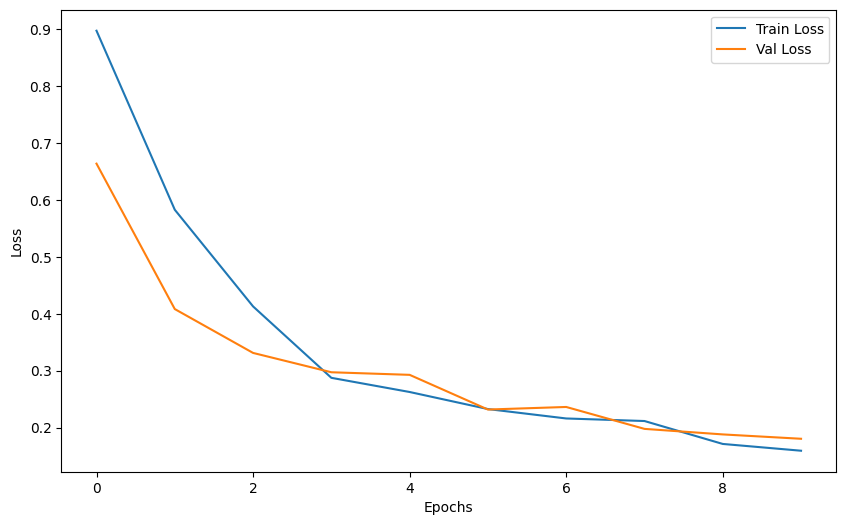

In [ ]:
trn_loss = history.history["loss"]
val_loss = history.history["val_loss"]
trn_acc  = history.history["accuracy"]
val_acc  = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.plot(trn_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

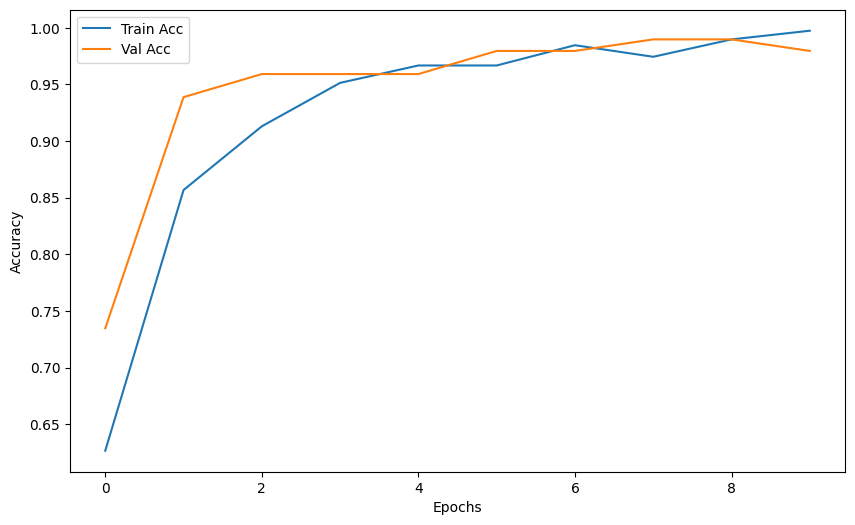

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(trn_acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Predict

file name: /content/drive/MyDrive/xray_dataset1/test/COVID-19(211).png


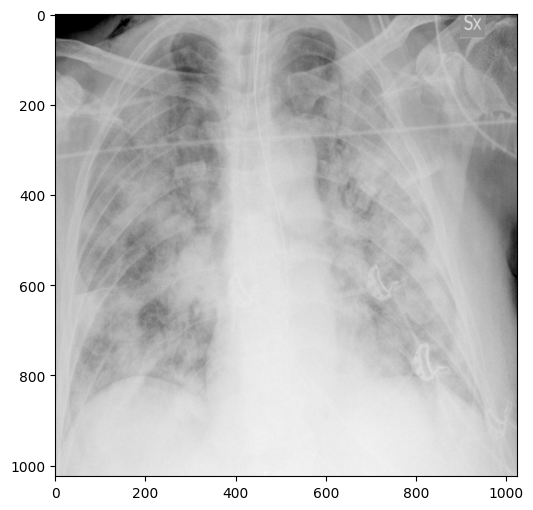

(64, 64, 3)
(1, 64, 64, 3)
COVID Score: 1324.43; NORMAL Score: -865.00

It's COVID-19.


In [ ]:
#從test1隨機選一張印出圖跟檔名
random_file = f"/content/drive/MyDrive/xray_dataset1/test/{tstset_path[random.randint(0, len(tstset_path))]}"
print("file name:", random_file)

img_bgr = cv.imread(random_file)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10,6))
plt.imshow(img_rgb)
plt.show()

img = cv.resize(img_bgr, (64, 64))
print(img.shape)
img_reshape = img.reshape(1, 64, 64, 3) # make it to 4 dim
print(img_reshape.shape)
predict = model(img_reshape)
predict
predict_np = predict.numpy()
predict_np
cod_score, nor_score = predict_np[0]
print(f"COVID Score: {cod_score:.2f}; NORMAL Score: {nor_score:.2f}\n")

if cod_score >= nor_score:
  print("It's COVID-19.")
else:
  print("It's NORMAL.")

In [ ]:

dir_path = "/content/drive/MyDrive/xray_dataset1/test"
img_size = (64, 64)
model = model

# 讀取目錄中的所有檔案
img_files = [f for f in os.listdir(dir_path) if f.endswith(".png")]


total_imgs = len(img_files)
correct_pred = 0

# 遍歷每個影像檔案，進行預測
for f in img_files:
    # 讀取影像檔案並進行前處理
    img_bgr = cv.imread(os.path.join(dir_path, f))
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
    img_resized = cv.resize(img_rgb, img_size)
    img_reshape = img_resized.reshape(1, *img_size, 3) # 轉換成4維格式

    # 進行預測
    predict = model(img_reshape)
    predict_np = predict.numpy()
    cod_score, nor_score = predict_np[0]
    print(f"Filename: {f} ; Prediction: {'COVID' if cod_score >= nor_score else 'NORMAL'}")
    #COVID Score: {cod_score:.2f}; NORMAL Score: {nor_score:.2f}

   # print(f"COVID Score: {cod_score:.2f}; NORMAL Score: {nor_score:.2f}\n")
    # 根據預測結果判斷正確性
    if (cod_score >= nor_score and "COVID" in f) or (cod_score < nor_score and "NORMAL" in f):
        correct_pred += 1

# 輸出正確率
accuracy = correct_pred / total_imgs
print(f"Total Images: {total_imgs}, Correct Prediction: {correct_pred}, Accuracy: {accuracy:.2%}")


Filename: COVID-19(214).png ; Prediction: COVID
Filename: COVID-19(191).png ; Prediction: NORMAL
Filename: COVID-19(216).png ; Prediction: COVID
Filename: COVID-19(212).png ; Prediction: COVID
Filename: COVID-19(198).png ; Prediction: COVID
Filename: COVID-19(199).png ; Prediction: COVID
Filename: COVID-19(192).png ; Prediction: COVID
Filename: COVID-19(207).png ; Prediction: COVID
Filename: COVID-19(217).png ; Prediction: NORMAL
Filename: COVID-19(208).png ; Prediction: COVID
Filename: COVID-19(213).png ; Prediction: COVID
Filename: COVID-19(218).png ; Prediction: COVID
Filename: COVID-19(196).png ; Prediction: COVID
Filename: COVID-19(203).png ; Prediction: COVID
Filename: COVID-19(205).png ; Prediction: COVID
Filename: COVID-19(211).png ; Prediction: COVID
Filename: COVID-19(204).png ; Prediction: COVID
Filename: COVID-19(219).png ; Prediction: COVID
Filename: COVID-19(193).png ; Prediction: NORMAL
Filename: COVID-19(209).png ; Prediction: COVID
Filename: COVID-19(202).png ; Predict